# About this notebook

Admittedly, I am a big fan of the R programming language.  You need only look around within my [Github repository](https://github.com/nicolasfoss) to find that out.

Some of what I say within this notebook may give you the impression that I am showing off Julia as a superior programming language.  Indeed, some may feel this way, but I do not.

However, I fully plan on learning Julia as I believe it is a powerful and very fast programming language which gives new opportunities to developers given its speed and intuitive syntax.

I want to highlight how easy it is to use Julia here, and hopefully encourage you to check out the language.

I welcome any suggestions for improvements to my code.  Please understand that I am not putting myself out there as an expert or authority on Julia.  Instead, I am learning with you! 

# The Iris and Boston Housing Datasets

Within this dataset, we will explore the famous Iris and Boston Housing datasets.  These datasets are wonderful for learning how to build machine learning models from code.  Here, we will focus more on exploratory data analysis, which is a key feature of machine learning workflows.

Check out these links to learn more about the [Iris](https://archive.ics.uci.edu/dataset/53/iris) and [Boston Housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) datasets.


## Set up your environment

We will want to first install and load the needed packages for the EDA, and get our datasets into memory. 

First, let's deal with the packages we need.

In [1]:
# Install packages
using Pkg
Pkg.add(["DataFrames", "Plots", "StatsPlots", "Statistics", "MLDatasets"]);

# Later we can load the packges with 'using' syntax so that package.function syntax is not necessary, thus streamlining our code
# MLDatasets is the package that has the Iris and Boston Housing files available to load as functions


   Resolving package versions...
  No Changes to `C:\Users\nfoss\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\nfoss\.julia\environments\v1.10\Manifest.toml`


## Get the Iris data into memory

In [30]:
using MLDatasets, DataFrames

# get the initial dataset
iris = Iris()

# pull out features
iris_features = iris.features

# pull out target variables
iris_targets = iris.targets

# get the complete dataframe
iris_df = hcat(iris_features, iris_targets)

150×5 DataFrame
 Row │ sepallength  sepalwidth  petallength  petalwidth  class          
     │ Float64      Float64     Float64      Float64     String15       
─────┼──────────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  Iris-setosa
   2 │         4.9         3.0          1.4         0.2  Iris-setosa
   3 │         4.7         3.2          1.3         0.2  Iris-setosa
   4 │         4.6         3.1          1.5         0.2  Iris-setosa
   5 │         5.0         3.6          1.4         0.2  Iris-setosa
   6 │         5.4         3.9          1.7         0.4  Iris-setosa
   7 │         4.6         3.4          1.4         0.3  Iris-setosa
   8 │         5.0         3.4          1.5         0.2  Iris-setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮             ⋮
 144 │         6.8         3.2          5.9         2.3  Iris-virginica
 145 │         6.7         3.3          5.7         2.5  Iris-virginica
 146 │         6.7         3.0          5.2         2.3  Iris-virginica
 147 │         6.3         2.5          5.0         1.9  Iris-virginica
 148 │         6.5         3.0          5.2         2.0  Iris-virginica
 149 │         6.2         3.4          5.4         2.3  Iris-virginica
 150 │         5.9         3.0          5.1         1.8  Iris-virginica
                                                        135 rows omitted

### A first look at the Iris data

An easy way to take a first look at your data in Julia is by using the describe() function from DataFrames.

In [18]:
# describe the dataframe

describe(iris_df, :all) # lazy way to see a number of statistics about the dataset in one fell swoop

# notice how describe() handles the text column 'class'
# it gives the unique values in alphabetical order within min, max, first, and last, but we do not see all the values
# we might want to see the unique classes as well

5×16 DataFrame
 Row │ variable     mean     std       min          q25     median  q75     ma ⋯
     │ Symbol       Union…   Union…    Any          Union…  Union…  Union…  An ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ sepallength  5.84333  0.828066  4.3          5.1     5.8     6.4     7. ⋯
   2 │ sepalwidth   3.054    0.433594  2.0          2.8     3.0     3.3     4.
   3 │ petallength  3.75867  1.76442   1.0          1.6     4.35    5.1     6.
   4 │ petalwidth   1.19867  0.763161  0.1          0.3     1.3     1.8     2.
   5 │ class                           Iris-setosa                          Ir ⋯
                                                               9 columns omitted

In [21]:
# get unique values within class
# subset the dataframe using the intuitive '.' syntax rather than bracketing using '$' within R, such as df$class or df["class"], or df %>% select(class)
unique(iris_df.class) 

# we can see that the :nunique function within describe() correctly found the 3 unique values, and now we can see what they are

3-element Vector{InlineStrings.String15}:
 "Iris-setosa"
 "Iris-versicolor"
 "Iris-virginica"

### Distribution of classes within the Iris dataset

Next, let's get counts of each class within Iris

In [31]:
# The combine function allows us to do aggregation using dataframes.
# groupby will allow us to use ideas from SQL to group a dataframe by a given variable(s) to perform different operations using those groups
# we use the nrow function to get the count of rows per class, but we pass this to a new column name :Count which is easier to understand in the output 
combine(groupby(iris_df, :class), nrow => :Count)

3×2 DataFrame
 Row │ class            Count 
     │ String15         Int64 
─────┼────────────────────────
   1 │ Iris-setosa         50
   2 │ Iris-versicolor     50
   3 │ Iris-virginica      50

### Visualizing the distribution of multiple variables at once

One of the features about R that can make EDA cumbersome is the way you have to go about making patchworks of plots, or getting plots all into one place to examine things without having to create multiple objects and printing those to your view port.

Let's check out how Julia can make this easier.

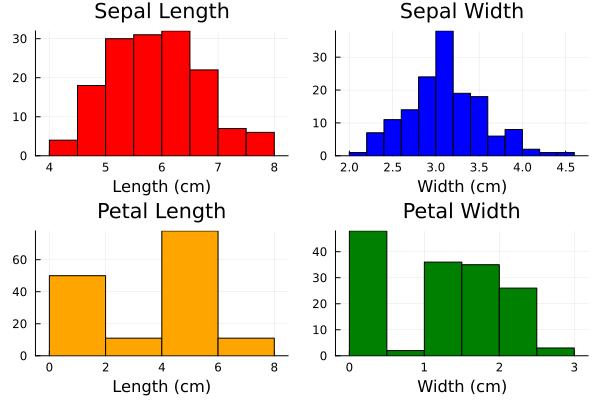

In [28]:
# The Plots package makes much of this possible

using Plots

# Create histograms for each feature
sepal_length_hist = histogram(iris_df.sepallength, title = "Sepal Length", xlabel="Length (cm)", labels = false, color = :red) # set color via :color syntax or "color"
sepal_width_hist = histogram(iris_df.sepalwidth, title = "Sepal Width", xlabel="Width (cm)", labels = false, color = :blue)
petal_length_hist = histogram(iris_df.petallength, title = "Petal Length", xlabel="Length (cm)", labels = false, color = :orange)
petal_width_hist = histogram(iris_df.petalwidth, title = "Petal Width", xlabel="Width (cm)", labels = false, color = :green)

plot_vector = [sepal_length_hist, sepal_width_hist, petal_length_hist, petal_width_hist]

# Combine the plots in a 2x2 layout
plot(plot_vector..., layout = (2, 2)) # the ... syntax tells plot() to iterate over all elements within the vector

### Simple as that!

Exploring the distribution of multiple variables is made quite easy using Julia and its intuitive syntax.

If you are already familiar with other programming languages, you will likely pick up what is going on without much work.

Let's move on to the Boston Housing dataset to see how we can deal with a dataset containing more features, which can be unwieldy when trying to get a sense of relationships among variables and the overall distributions we are dealing with in the data.

## Get the housing data into memory

In [14]:
# Get the housing dataset into memory
housing = BostonHousing()

# get the first 13 columns
features = housing.features

# get the last column used as outcome variable in ML tasks
targets = housing.targets

# union
housing_df = hcat(features, targets); # semicolon at the end to prevent output of the df, feel free to remove if desired


### Note

Given that we already loaded the DataFrames package, we can now take a look at the new dataframe

In [4]:
# Describe the DataFrame

describe(housing_df) # out of the box you get the variable names, mean, minimum, median, maximum, # missing, and data type for each.

# you can also use describe(df, :all) to get a few other outputs which may be helpful, and help you choose how you want to customize your output to descrbe()

14×7 DataFrame
 Row │ variable  mean        min        median     max       nmissing  eltype  ⋯
     │ Symbol    Float64     Real       Float64    Real      Int64     DataTyp ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CRIM        3.61352     0.00632    0.25651   88.9762         0  Float64 ⋯
   2 │ ZN         11.3636      0.0        0.0      100.0            0  Float64
   3 │ INDUS      11.1368      0.46       9.69      27.74           0  Float64
   4 │ CHAS        0.06917     0          0.0        1              0  Int64
   5 │ NOX         0.554695    0.385      0.538      0.871          0  Float64 ⋯
   6 │ RM          6.28463     3.561      6.2085     8.78           0  Float64
   7 │ AGE        68.5749      2.9       77.5      100.0            0  Float64
   8 │ DIS         3.79504     1.1296     3.20745   12.1265         0  Float64
   9 │ RAD         9.54941     1          5.0       24              0  Int64   ⋯
  10 │ TAX       408.237     187        330.0      711              0  Int64
  11 │ PTRATIO    18.4555     12.6       19.05      22.0            0  Float64
  12 │ B         356.674       0.32     391.44     396.9            0  Float64
  13 │ LSTAT      12.6531      1.73      11.36      37.97           0  Float64 ⋯
  14 │ MEDV       22.5328      5.0       21.2       50.0            0  Float64
                                                                1 column omitted

### Improving the summary

We might want to add a few things to the summary of the table, and we can do so with an intuitive syntax

In [13]:
# add the standard deviation, 25% and 75% quartiles, # unique values, total nonmissing, and keep the rest in the summary for applicable variables
describe(housing_df, :mean, :std, :min, :q25, :median, :q75, :max, :nmissing, :nnonmissing, :nuniqueall, :eltype)

14×12 DataFrame
 Row │ variable  mean        std         min        q25         median     q75 ⋯
     │ Symbol    Float64     Float64     Real       Float64     Float64    Flo ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CRIM        3.61352     8.60155     0.00632    0.082045    0.25651    3 ⋯
   2 │ ZN         11.3636     23.3225      0.0        0.0         0.0       12
   3 │ INDUS      11.1368      6.86035     0.46       5.19        9.69      18
   4 │ CHAS        0.06917     0.253994    0          0.0         0.0        0
   5 │ NOX         0.554695    0.115878    0.385      0.449       0.538      0 ⋯
   6 │ RM          6.28463     0.702617    3.561      5.8855      6.2085     6
   7 │ AGE        68.5749     28.1489      2.9       45.025      77.5       94
   8 │ DIS         3.79504     2.10571     1.1296     2.10018     3.20745    5
   9 │ RAD         9.54941     8.70726     1          4.0         5.0       24 ⋯
  10 │ TAX       408.237     168.537     187        279.0       330.0      666
  11 │ PTRATIO    18.4555      2.16495    12.6       17.4        19.05      20
  12 │ B         356.674      91.2949      0.32     375.377     391.44     396
  13 │ LSTAT      12.6531      7.14106     1.73       6.95       11.36      16 ⋯
  14 │ MEDV       22.5328      9.1971      5.0       17.025      21.2       25
                                                               6 columns omitted

### Visualizing the distribution of variables of interest

Now that we have taken a first glance at the Boston Housing dataset, let's visualize the distribution of the variables.

Going one at a time would be time consuming.  A powerful feature of Julia is that it makes what can be a bit labor intensive in the R programming language using the [patchwork](https://patchwork.data-imaginist.com/articles/patchwork.html) package quite natural using Plots.

Julia also has the ability to iterate using for loops, which are quite helpful here.

Observe:

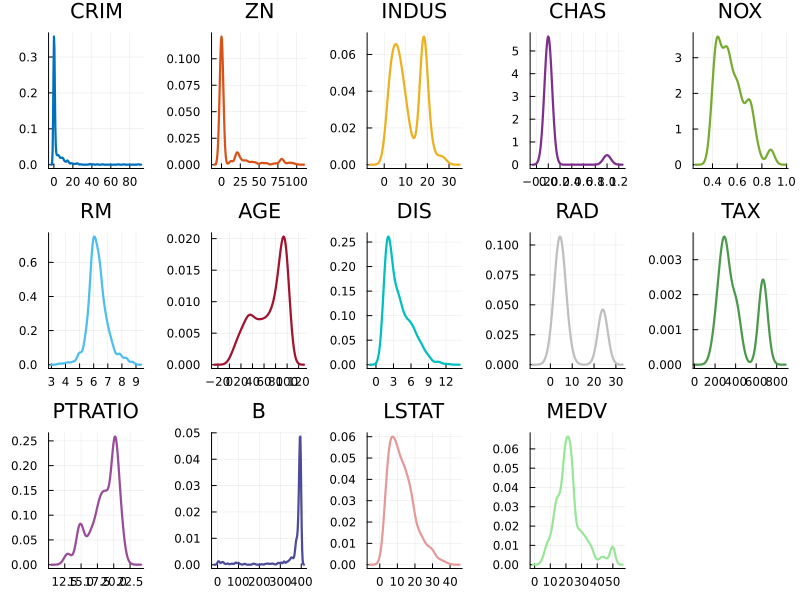

In [43]:
using StatsPlots
using DataFrames
using Colors  # For RGB colors

# Define a colorblind-friendly palette with 14 colors
colorblind_friendly_palette = [
    RGB(0.0, 0.447, 0.741),  # Blue
    RGB(0.850, 0.325, 0.098), # Orange
    RGB(0.929, 0.694, 0.125), # Yellow
    RGB(0.494, 0.184, 0.556), # Purple
    RGB(0.466, 0.674, 0.188), # Green
    RGB(0.301, 0.745, 0.933), # Light Blue
    RGB(0.635, 0.078, 0.184), # Dark Red
    RGB(0.0, 0.75, 0.75),     # Teal
    RGB(0.75, 0.75, 0.75),     # Light Gray
    RGB(0.3, 0.6, 0.3),        # Olive
    RGB(0.6, 0.3, 0.6),        # Violet
    RGB(0.3, 0.3, 0.6),        # Navy Blue
    RGB(0.9, 0.6, 0.6),        # Light Coral
    RGB(0.6, 0.9, 0.6)         # Light Green
]

# Get column names from housing_df
column_names = names(housing_df)

# Create the density plots using a for loop
housing_density_plots = []

for i in 1:ncol(housing_df)
    push!(housing_density_plots, density(housing_df[!, i], 
        title = column_names[i], 
        xlabel = column_names[i], 
        ylabel = "Density", 
        legend = false, 
        linewidth = 2.25,
        color = colorblind_friendly_palette[i]
    ))
end

# Plot the density plots in a 3x5 grid
plot(housing_density_plots..., layout = (3, 5), size = (800, 600), xlabel = "", ylabel = "")

# the output of the x axis ticks is not great, but we can see how easily we produced this plot.  Customizing it to look better would be no problem.


### Visualizing the relationship between the variables

Correlation is a commonly used quantity to understand the relationship between different variables.

It can be time consuming to go variable by variable to see relationships it has between other variables.

Why not use a correlation matrix?

Julia can do this and the process to get this done is simple.

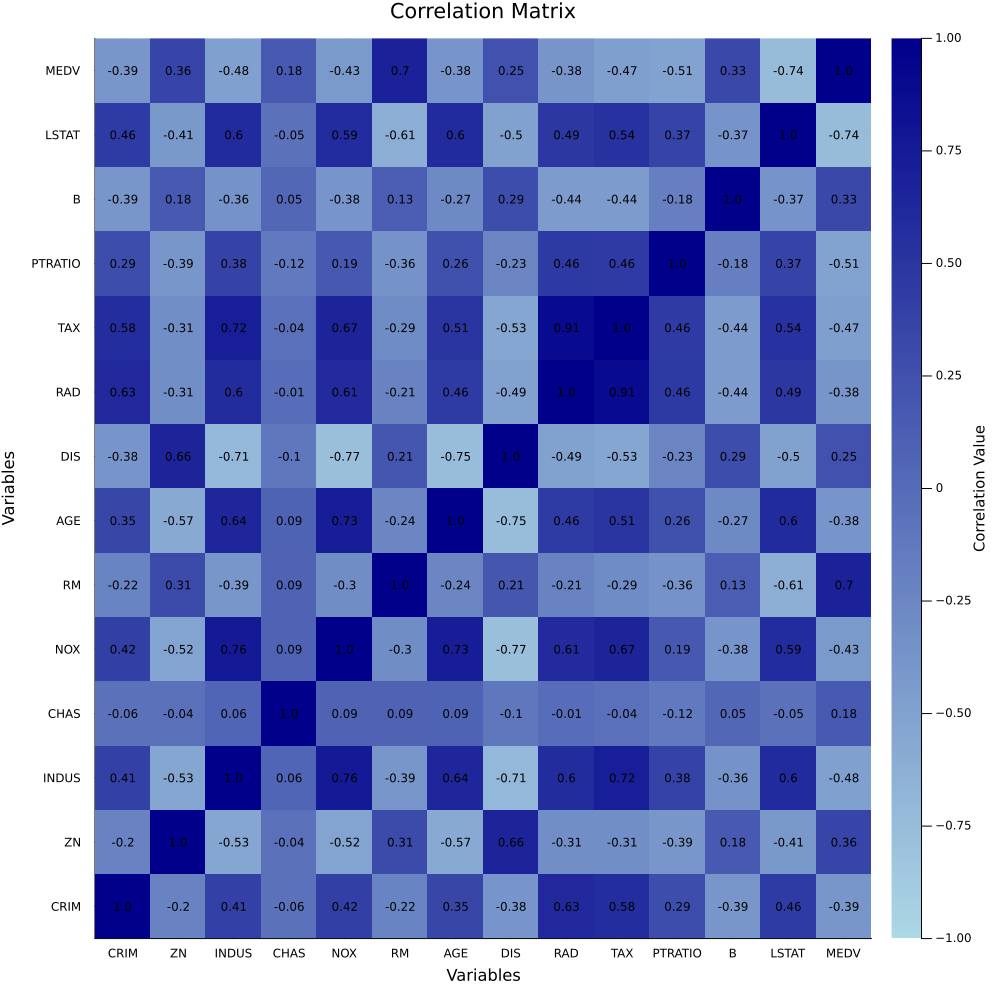

In [44]:
using MLDatasets, DataFrames, Plots

# Compute the correlation matrix
corr_matrix = cor(Matrix(housing_df))

# Get column names
column_names = names(housing_df)

# Create the heatmap
heatmap_plot = heatmap(corr_matrix, 
        title="Correlation Matrix", 
        xlabel="Variables", 
        ylabel="Variables", 
        color=:blues, 
        clims=(-1, 1), 
        size=(1000, 1000), 
        xticks=(1:length(column_names), column_names), 
        yticks=(1:length(column_names), column_names), 
        colorbar=true, 
        colorbar_title="Correlation Value",
        colorbar_titlefontsize=10,  # Set font size for the colorbar title
        colorbar_ticksfontsize=8,   # Set font size for the colorbar ticks
        annot=false)                # Disable built-in annotations

# Overlay annotations manually
for i in 1:size(corr_matrix, 1)
    for j in 1:size(corr_matrix, 2)
        annotate!(heatmap_plot, j, i, text(string(round(corr_matrix[i, j], digits=2)), :black, 8))
    end
end

# Display the plot
display(heatmap_plot)


### Visualizing correlation using regression

We can create multiple scatterplots and show the relationships among different variables in the dataset that we may be interested in exploring more in a machine learning model.

Julia makes this easy by including a smooth argument within the scatter() plotting function to add in a regression line.  Out of the box it uses linear regression which is suitable here.

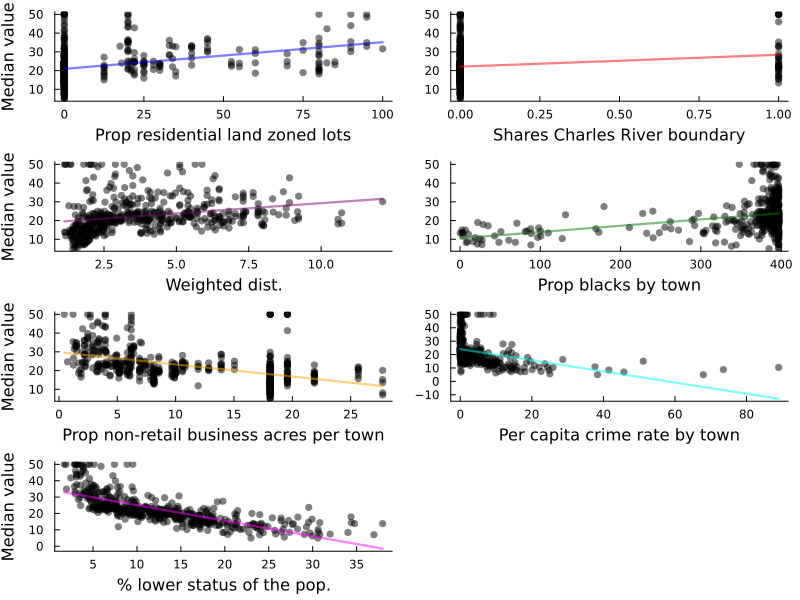

In [40]:
# 

using Plots

# Define plots with smooth lines
p1 = scatter(housing_df.ZN, housing_df.MEDV,
    xlabel = "Prop residential land zoned lots",
    ylabel = "Median value",
    seriestype = :scatter,
    legend = false,
    alpha = 0.5,
    color = :black,
    grid = false,
    smooth = true,
    linewidth = 2.25,
    linecolor = :blue
)

p2 = scatter(housing_df.CHAS, housing_df.MEDV,
    xlabel = "Shares Charles River boundary",
    ylabel = "",
    seriestype = :scatter,
    legend = false,
    alpha = 0.5,
    color = :black,
    grid = false,
    smooth = true,
    linewidth = 2.25,
    linecolor = :red
)

p3 = scatter(housing_df.DIS, housing_df.MEDV,
    xlabel = "Weighted dist.",
    ylabel = "Median value",
    seriestype = :scatter,
    legend = false,
    alpha = 0.5,
    color = :black,
    grid = false,
    smooth = true,
    linewidth = 2.25,
    linecolor = :purple
)

p4 = scatter(housing_df.B, housing_df.MEDV,
    xlabel = "Prop blacks by town",
    ylabel = "",
    seriestype = :scatter,
    legend = false,
    alpha = 0.5,
    color = :black,
    grid = false,
    smooth = true,
    linewidth = 2.25,
    linecolor = :green
)

p5 = scatter(housing_df.INDUS, housing_df.MEDV,
    xlabel = "Prop non-retail business acres per town",
    ylabel = "Median value",
    seriestype = :scatter,
    legend = false,
    alpha = 0.5,
    color = :black,
    grid = false,
    smooth = true,
    linewidth = 2.25,
    linecolor = :orange
)

p6 = scatter(housing_df.CRIM, housing_df.MEDV,
    xlabel = "Per capita crime rate by town",
    ylabel = "",
    seriestype = :scatter,
    legend = false,
    alpha = 0.5,
    color = :black,
    grid = false,
    smooth = true,
    linewidth = 2.25,
    linecolor = :cyan
)

p7 = scatter(housing_df.LSTAT, housing_df.MEDV,
    xlabel = "% lower status of the pop.",
    ylabel = "Median value",
    seriestype = :scatter,
    legend = false,
    alpha = 0.5,
    color = :black,
    grid = false,
    smooth = true,
    linewidth = 2.25,
    linecolor = :magenta
)

# Store plots in a vector
scatter_vector = [p1, p2, p3, p4, p5, p6, p7]

# Display all plots in a grid layout
plot(scatter_vector..., layout = (4, 2), size = (800, 600))


# Conclusion

Hopefully, I have shown you how Julia can be quite useful for exploratory data analysis.

The truth is that Julia is under heavy development as open source in a growing community.

Personally, I plan on making use of Julia at the very least for EDA in the future given its speed and how intuitive it is.  

I am excited to see what comes of this useful programming language and I hope this brief notebook has given you more information to help you see whether or not Julia can be useful for you.